<a href="https://colab.research.google.com/github/krisana-y/229352-StatisticalLearning/blob/main/Lab06_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Statistical Learning for Data Science 2 (229352)
#### Instructor: Donlapark Ponnoprat

#### [Course website](https://donlapark.pages.dev/229352/)

## Lab #6

## Support Vector Machines (SVM)

[SVM module documentation](https://scikit-learn.org/stable/modules/svm.html#svm)

[LinearSVC documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC)

[SVC documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC  # fast but only linear
from sklearn.svm import SVC  # slower but can do kernels

In [ ]:
# Load the iris data
iris = datasets.load_iris()
X = iris.data[:, 2:]
y = iris.target

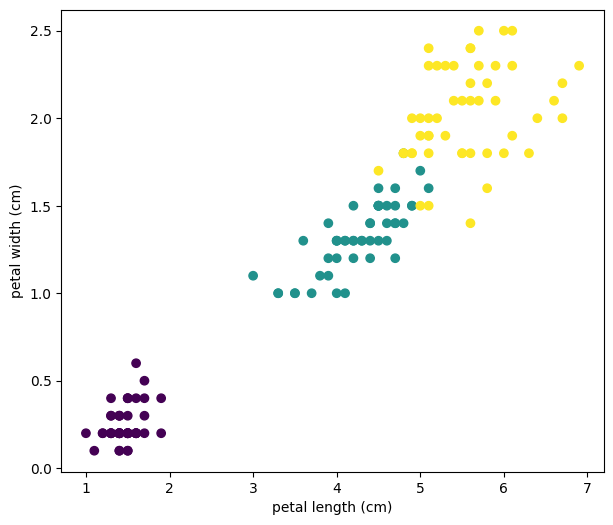

In [ ]:
# Plot the data
plt.figure(figsize=(7,6))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.show()

#### In this problem, you'll use support vector machines to classify the Iris data

#### The following function helps you plot the decision boundary.

In [ ]:
# Plot the decision boundaries
def plot_decision_boundary(clf, X, y):
    h = 0.005  # Boundary lines' resolution
    x_min, x_max = X[:,0].min() - 10*h, X[:,0].max() + 10*h
    y_min, y_max = X[:,1].min() - 10*h, X[:,1].max() + 10*h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(7,6))
    plt.contourf(xx, yy, Z, alpha=0.25)  # Background
    plt.contour(xx, yy, Z, colors='k', linewidths=0.2)  # Boundary lines
    plt.scatter(X[:,0], X[:,1], c=y);  # Data points
    plt.xlabel(iris.feature_names[2])
    plt.ylabel(iris.feature_names[3])

#### Exercise 1. Split the data into training set and test set.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Exercise 2. Learn a linear SVM classifier using sklearn.svm.LinearSVC. You will need to set `loss='hinge'`.

#### Try different values of the tradeoff parameter: `C = 0.01, 0.1, 1.0, 10.0, 100.0` and use `plot_decision_boundary` to plot the decision boundary.

#### If you encounter `RuntimeError`, consider setting `max_iter=100000`

#### What is the effect of `C` on the decision boundary?

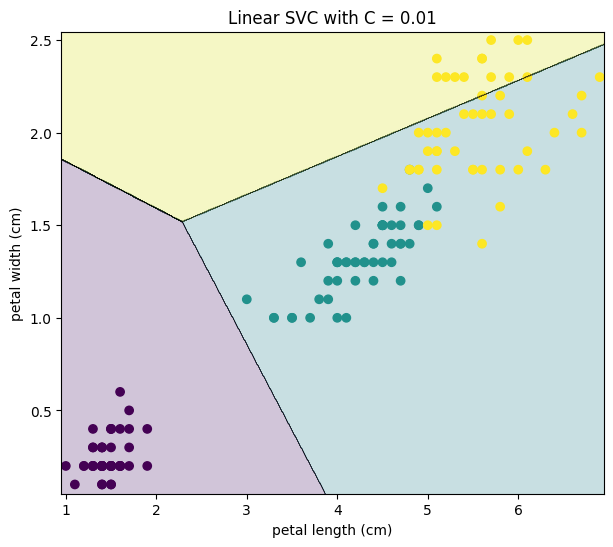

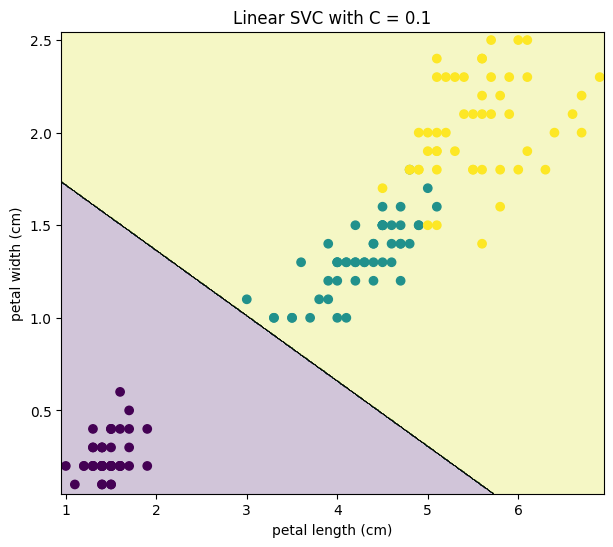

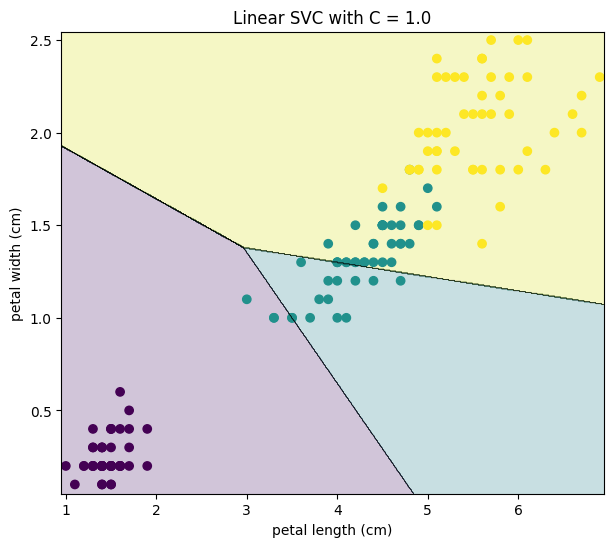

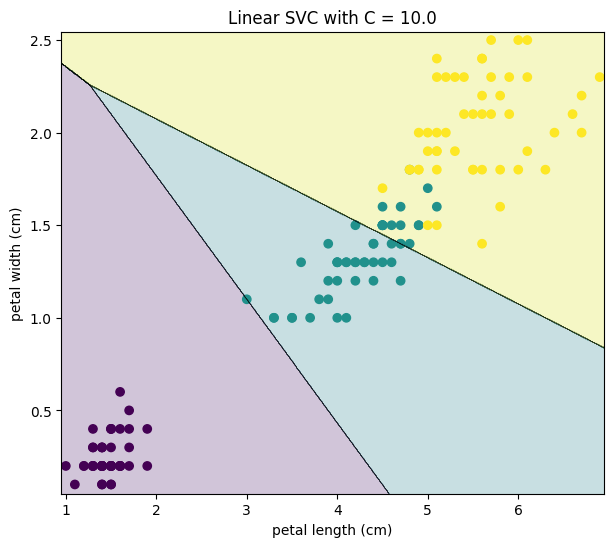

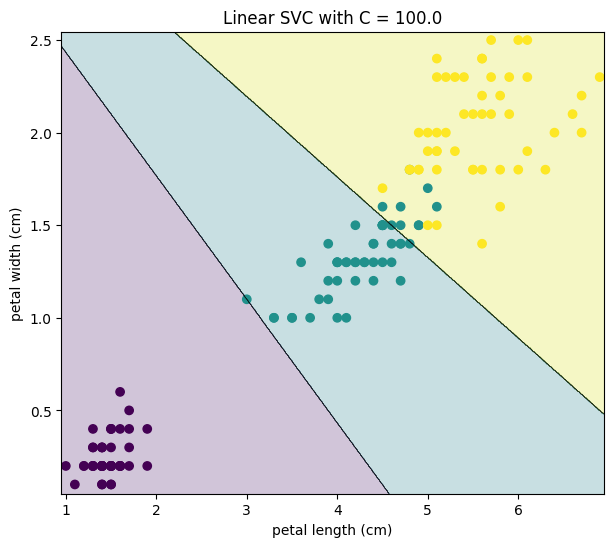

In [ ]:
c_values = [0.01, 0.1, 1.0, 10.0, 100.0]

for c in c_values:
    linear_svm_clf = LinearSVC(loss='hinge', C=c, max_iter=100000)
    linear_svm_clf.fit(X_train, y_train)
    plot_decision_boundary(linear_svm_clf, X, y)
    plt.title(f'Linear SVC with C = {c}')
    plt.show()

In short, the C value in Linear SVM controls the balance between having a wide margin and classifying data points as correctly as possible:

**Small C:** The margin becomes wider, allowing some misclassifications. This makes the model simpler (reduces Overfitting).

**Large C:** The margin becomes narrower, attempting to classify every point correctly. This makes the model more complex (can lead to Overfitting).


#### Exercise 3. Pick a value of `C` that you like. Then report the test error.

In [ ]:
from sklearn.metrics import accuracy_score
chosen_C = 1.0

linear_svm_clf = LinearSVC(loss='hinge', C=chosen_C, max_iter=100000, random_state=42)
linear_svm_clf.fit(X_train, y_train)

y_pred = linear_svm_clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
test_error = 1 - test_accuracy

print(f"Test accuracy with C = {chosen_C}: {test_accuracy:.4f}")
print(f"Test error with C = {chosen_C}: {test_error:.4f}")

Test accuracy with C = 1.0: 0.8333
Test error with C = 1.0: 0.1667


#### Exercise 4. Now try kernel SVM with a quadratic kernel. You can do this with sklearn.svm.SVC, setting `kernel='rbf'` and `C = 1.0`.

#### Try different values of the tradeoff parameter: `gamma = 0.01, 0.1, 1.0, 10.0, 100.0` and use `plot_decision_boundary` to plot the decision boundary.

#### If you encounter `RuntimeError`, consider setting `max_iter=100000`

#### What is the effect of `gamma` on the decision boundary?

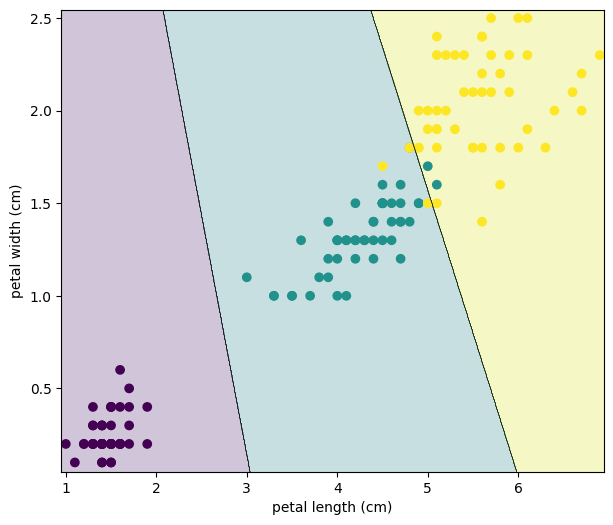

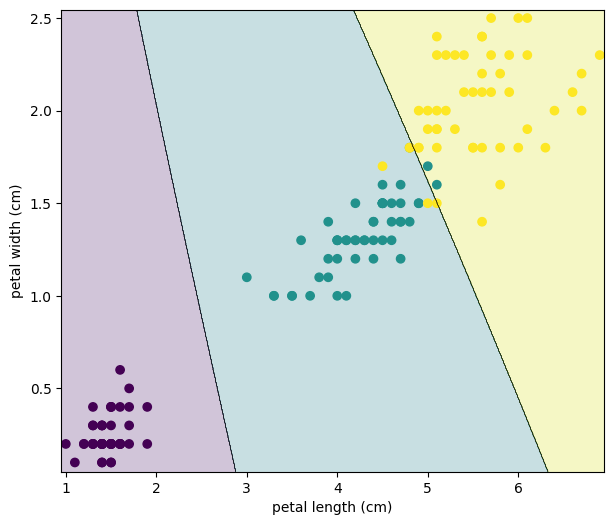

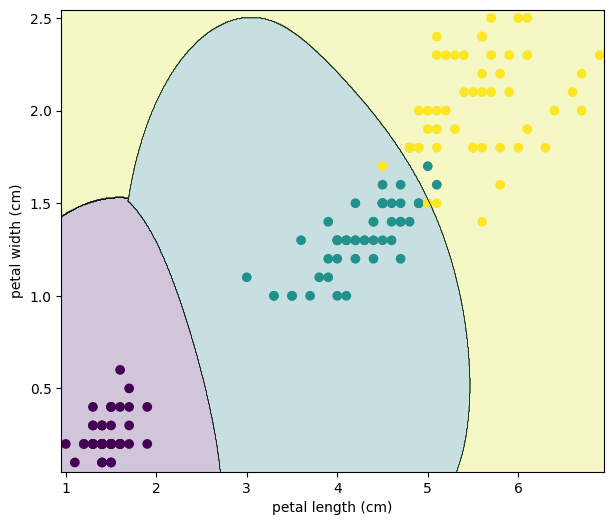

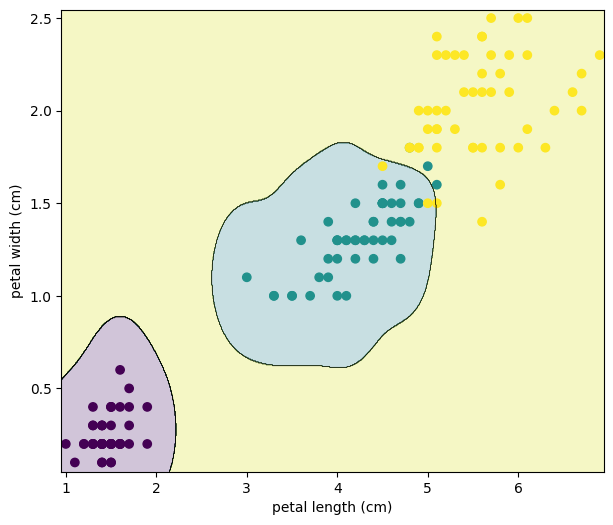

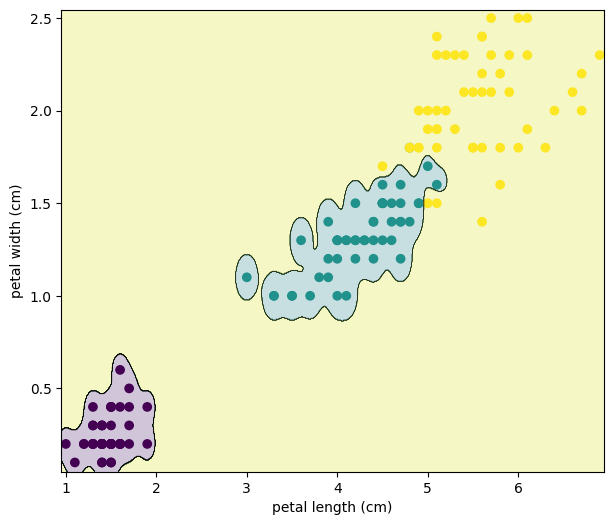

In [ ]:
svc=SVC(kernel='rbf', C=1.0, gamma=0.01, max_iter=10000)
svc.fit(X, y)
plot_decision_boundary(svc, X, y)

svc=SVC(kernel='rbf', C=1.0, gamma=0.1, max_iter=10000)
svc.fit(X, y)
plot_decision_boundary(svc, X, y)

svc=SVC(kernel='rbf', C=1.0, gamma=1.0, max_iter=10000)
svc.fit(X, y)
plot_decision_boundary(svc, X, y)

svc=SVC(kernel='rbf', C=1.0, gamma=10.0, max_iter=10000)
svc.fit(X, y)
plot_decision_boundary(svc, X, y)

svc=SVC(kernel='rbf', C=1.0, gamma=100.0, max_iter=10000)
svc.fit(X, y)
plot_decision_boundary(svc, X, y)


In short, the gamma value in Kernel SVM (with RBF kernel) controls the influence of each training example:

**Small gamma:** Larger influence, smoother boundary, less prone to overfitting.

**Large gamma:** Smaller influence, more complex boundary, more prone to overfitting.

#### Exercise 5. Pick a value of `gamma` that you like. Then report the test error and the number of support vectors.

In [ ]:
from sklearn.metrics import accuracy_score

chosen_gamma = 1.0
chosen_C_for_kernel = 1.0

kernel_svm_clf = SVC(kernel='rbf', C=chosen_C_for_kernel, gamma=chosen_gamma, random_state=42)
kernel_svm_clf.fit(X_train, y_train)

y_pred_kernel = kernel_svm_clf.predict(X_test)
test_accuracy_kernel = accuracy_score(y_test, y_pred_kernel)
test_error_kernel = 1 - test_accuracy_kernel

n_support_vectors = kernel_svm_clf.support_vectors_.shape[0]

print(f"Test accuracy with C = {chosen_C_for_kernel}, gamma = {chosen_gamma}: {test_accuracy_kernel:.4f}")
print(f"Test error with C = {chosen_C_for_kernel}, gamma = {chosen_gamma}: {test_error_kernel:.4f}")
print(f"Number of support vectors: {n_support_vectors}")

Test accuracy with C = 1.0, gamma = 1.0: 1.0000
Test error with C = 1.0, gamma = 1.0: 0.0000
Number of support vectors: 30


#### Exercise 6. Between Linear SVM and Kernel SVM, which model would you prefer to use for classification of Iris data?
1. Explain using test accuracy
2. Explaing using decision boundary plot

**Linear SVM:** Has a higher test error (0.1667) and the decision boundary is a straight line, which may not separate overlapping data as well as needed.

**Kernel SVM** (RBF kernel, C=1.0, gamma=1.0): Has a test error of zero (0.0000) and the decision boundary is non-linear, which can separate the classes better.

Therefore, Kernel SVM is more suitable for classifying the Iris data because the Iris data is not perfectly linearly separable, allowing Kernel SVM with a more flexible decision boundary to perform better.

